<H1>EW Project</H1>

<h3>Imports</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<H3>Use Case 1 </H3>

Monthly report of top ten Dealers and parts that has been failed: 
- We need to generate the list of top ten dealers that are processing the extended warranty of 
parts and also need to find out the most frequent part’s which are reported as a defective. 
- The list of top ten dealers helps the company to analyze and understand the performances of 
dealers. 
- Monthly report of top ten failed parts helps the company to understand following: a) Quality of the parts  
b) Pattern of failure 
c) Mostly reported failed part in the quarter/year 
- Data visualization libraries like seaborn and matplotlib are used to visualize the data. 

   Dealer_ID      Dealer_Name Dealer_Country      State       City  ZIpCode
0          1  Kenneth Schmitt          india        Goa      Panji   400001
1          2  Owen Mclaughlin          india      Delhi     Naoida   400002
2          3  Donald Repinski          india  Karnataka  Bangalore   400003
3          4    Rachel Oszust          india     Gujrat  Ahemdabad   400004
4          5       Lynn Knapp          india     Orrisa    Cuttack   400005
   claim_id claim_date  claim_amount  Dealer_ID  Cust_ID  Part_ID  \
0         1 2020-04-01         36000          5      104      901   
1         2 2020-04-01         42000          6      106      902   
2         3 2020-04-01         45000          4      103      903   
3         4 2020-04-01         56000          3      102      904   
4         5 2020-04-01         39000          2      105      905   

  Repair_or_Replace  
0               rpr  
1              rplc  
2               rpr  
3              rplc  
4               rpr

<Axes: xlabel='Repair_or_Replace', ylabel='count'>

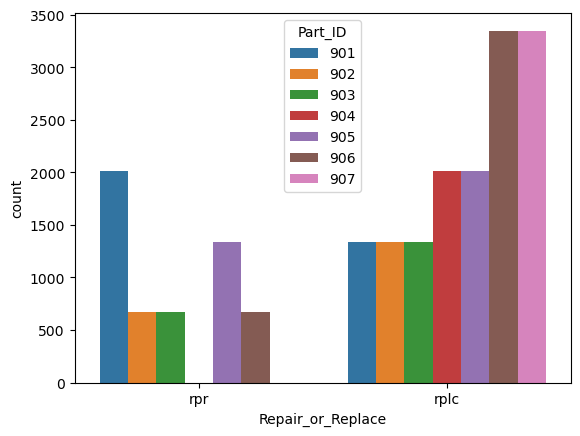

In [33]:
Dealer= pd.read_excel('Dataset.xlsx', sheet_name=0)
print(Dealer.head(5))
Claims = pd.read_excel('Dataset.xlsx',sheet_name=2)
print(Claims.head(5))
print(Claims['Dealer_ID'].value_counts())
print(Claims['Part_ID'].value_counts().idxmax())
print(Claims['Dealer_ID'].nlargest(n=10))
sns.countplot(x = 'Repair_or_Replace', data=Claims, hue ='Part_ID')

<Axes: xlabel='Part_ID', ylabel='count'>

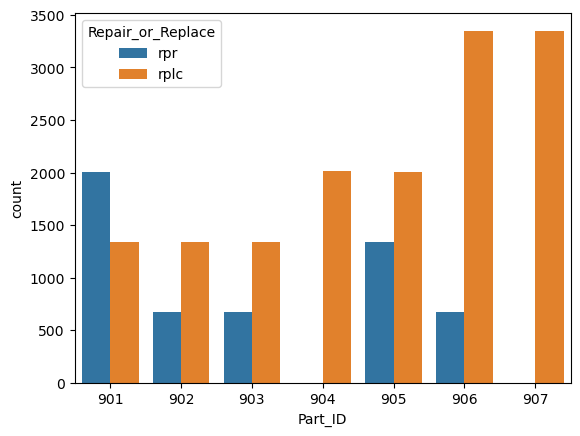

In [29]:
sns.countplot(x = 'Part_ID', data=Claims, hue ='Repair_or_Replace')

<H3>Use Case 2</H3>

Predict the parts that may fail according to the location, mileage and age: 
- In this case, by analyzing the historical data, we need to predict the parts that can be expected 
to fail according to the age, km driven and location of the vehicle. 
- This data helps the company to understand the manufacturing requirements of the part i.e. 
which part is to be manufactured in what quantity so as to avoid unavailability of the parts 
when claim is raised for that part.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read data from Excel sheets
Claims = pd.read_excel("Dataset.xlsx", sheet_name="Claims")
Dealer = pd.read_excel("Dataset.xlsx", sheet_name="Dealers")
Parts = pd.read_excel("Dataset.xlsx", sheet_name="Parts")

# Merge relevant data frames
merged_df = pd.merge(Claims, Parts, on='Part_ID', how='left')
merged_df = pd.merge(merged_df, Dealer, on='Dealer_ID', how='left')

# Convert date columns to datetime format
merged_df['claim_date'] = pd.to_datetime(merged_df['claim_date'])
merged_df['Manf_Date'] = pd.to_datetime(merged_df['Manf_Date'])

# Calculate age of the parts in days
merged_df['Part_Age'] = (merged_df['claim_date'] - merged_df['Manf_Date']).dt.days

# Extract relevant features and target variable
features = merged_df[['Part_Age', 'Kilometers_Driven', 'Location']]
target = merged_df['Failure']  # Assuming 'Failure' is the target variable indicating parts failure

# Convert categorical variables into numerical using one-hot encoding
features = pd.get_dummies(features, columns=['Location'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

KeyError: "['Kilometers_Driven', 'Location'] not in index"

In [ ]:
# USE CASE 3

In [ ]:
df1 = pd.read_excel("Dataset.xlsx", sheet_name=2)

In [ ]:
df1.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,Repair_or_Replace
0,1.0,2020-04-01,36000.0,5.0,104.0,901.0,rpr
1,2.0,2020-04-01,42000.0,6.0,106.0,902.0,rplc
2,3.0,2020-04-01,45000.0,4.0,103.0,903.0,rpr
3,4.0,2020-04-01,56000.0,3.0,102.0,904.0,rplc
4,5.0,2020-04-01,39000.0,2.0,105.0,905.0,rpr


In [ ]:
pd.get_dummies(df1['Repair_or_Replace'])

,rplc,rpr
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
20090,1,0
20091,1,0
20092,1,0
20093,1,0


In [ ]:
RepairorReplace = pd.get_dummies(df1['Repair_or_Replace'], drop_first=True)

In [ ]:
RepairorReplace

,rpr
0,1
1,0
2,1
3,0
4,1
...,...
20090,0
20091,0
20092,0
20093,0


In [ ]:
df1.drop('Repair_or_Replace', axis=1, inplace=True)

In [ ]:
df1.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID
0,1.0,2020-04-01,36000.0,5.0,104.0,901.0
1,2.0,2020-04-01,42000.0,6.0,106.0,902.0
2,3.0,2020-04-01,45000.0,4.0,103.0,903.0
3,4.0,2020-04-01,56000.0,3.0,102.0,904.0
4,5.0,2020-04-01,39000.0,2.0,105.0,905.0


In [ ]:
df1 = pd.concat([df1, RepairorReplace], axis=1)

In [ ]:
df1.head()

,claim_id,claim_date,claim_amount,Dealer_ID,Cust_ID,Part_ID,rpr
0,1.0,2020-04-01,36000.0,5.0,104.0,901.0,1
1,2.0,2020-04-01,42000.0,6.0,106.0,902.0,0
2,3.0,2020-04-01,45000.0,4.0,103.0,903.0,1
3,4.0,2020-04-01,56000.0,3.0,102.0,904.0,0
4,5.0,2020-04-01,39000.0,2.0,105.0,905.0,1


In [ ]:
df1.corr()

,claim_id,claim_amount,Dealer_ID,Cust_ID,Part_ID,rpr
claim_id,1.000000,0.000214,0.002988,-0.000791,0.000189,-0.000169
claim_amount,0.000214,1.000000,-0.000154,-0.001481,-0.285543,-0.264751
Dealer_ID,0.002988,-0.000154,1.000000,0.007710,-0.002561,0.000630
Cust_ID,-0.000791,-0.001481,0.007710,1.000000,0.002312,-0.001301
Part_ID,0.000189,-0.285543,-0.002561,0.002312,1.000000,-0.364181
rpr,-0.000169,-0.264751,0.000630,-0.001301,-0.364181,1.000000


In [ ]:
df1.drop(['claim_id', 'claim_date', 'Dealer_ID', 'Cust_ID'],axis=1, inplace=True)

In [ ]:
df1.head()

,claim_amount,Part_ID,rpr
0,36000.0,901.0,1
1,42000.0,902.0,0
2,45000.0,903.0,1
3,56000.0,904.0,0
4,39000.0,905.0,1


In [ ]:
df1['rpr'].unique()

array([1, 0], dtype=uint8)

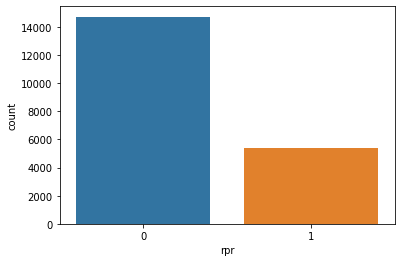

In [ ]:
sns.countplot(x = 'rpr', data=df1 )

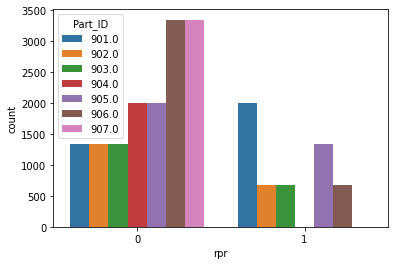

In [ ]:
sns.countplot(x = 'rpr', data=df1, hue='Part_ID')

In [ ]:
df1.corr()

,claim_amount,Part_ID,rpr
claim_amount,1.000000,-0.285543,-0.264751
Part_ID,-0.285543,1.000000,-0.364181
rpr,-0.264751,-0.364181,1.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   claim_amount  20095 non-null  float64
 1   Part_ID       20095 non-null  float64
 2   rpr           20095 non-null  uint8  
dtypes: float64(2), uint8(1)
memory usage: 333.7 KB


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20095 entries, 0 to 20094
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   claim_amount  20095 non-null  float64
 1   Part_ID       20095 non-null  float64
 2   rpr           20095 non-null  uint8  
dtypes: float64(2), uint8(1)
memory usage: 333.7 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df1.drop('rpr', axis=1))
scaled_feature = scaler.transform(df1.drop('rpr', axis=1))

In [ ]:
df_feat = pd.DataFrame(scaled_feature, columns=['claim_amount' ,'Part_ID'])

In [ ]:
df_feat.head()

,claim_amount,Part_ID
0,-0.916372,-1.558062
1,-0.418021,-1.081070
2,-0.168845,-0.604079
3,0.744799,-0.127087
4,-0.667196,0.349905


In [ ]:
df_feat.corr()

,claim_amount,Part_ID
claim_amount,1.000000,-0.285543
Part_ID,-0.285543,1.000000


In [ ]:
pd.concat([df_feat, df1['rpr']], axis=1).corr()

,claim_amount,Part_ID,rpr
claim_amount,1.000000,-0.285543,-0.264751
Part_ID,-0.285543,1.000000,-0.364181
rpr,-0.264751,-0.364181,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(df_feat, df1['rpr'], test_size=0.4)

In [ ]:
X_train.shape

(12057, 2)

In [ ]:
y_test.shape

(8038,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[5878,    0],
       [   0, 2160]])

In [ ]:
print(accuracy_score(y_test, y_pred))

1.0


Use case 3

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Sample data (Replace with your actual data)
data = pd.read_csv('last_claimed_data.csv')

# Feature selection
X = data[['feature1', 'feature2', 'feature3']]  # Replace with relevant features
y = data['repair_or_replace']

# Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Predict
prediction = clf.predict([[value1, value2, value3]])  # Replace with actual values

print("Decision:", prediction)

Use Case 4

In [1]:
from sklearn.ensemble import RandomForestClassifier


data = pd.read_csv('customer_feedback_data.csv')

# Feature selection
X = data[['feedback_score', 'churn_rate', 'location_preference']]
y = data['retained_customer']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict
predictions = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

NameError: name 'pd' is not defined

Use case 5

In [ ]:
import os
import pandas as pd

# Read data from multiple files and concatenate
data_files = ['data_us.csv', 'data_canada.csv', 'data_china.csv', 'data_india.csv']

all_data = pd.concat([pd.read_csv(file) for file in data_files])